In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [2]:
data = pd.read_csv("train_landmark.csv")

In [3]:
X = data.values[:,:-1]
y = data.values[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
compute_class_weight(class_weight='balanced',
                     classes=np.unique(y_train),
                     y=y_train)

array([1.12408759, 1.03010033, 0.87252125, 1.17557252, 0.94478528,
       0.92215569])

In [5]:
label_encoder = LabelEncoder()
int_y_train = label_encoder.fit_transform(y_train)
int_y_test = label_encoder.fit_transform(y_test)
int_y = label_encoder.fit_transform(y)

In [6]:
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)

Learning rate set to 0.081644
0:	learn: 1.5905466	total: 96.4ms	remaining: 1m 36s
1:	learn: 1.4216539	total: 123ms	remaining: 1m 1s
2:	learn: 1.2951113	total: 147ms	remaining: 48.8s
3:	learn: 1.1777579	total: 172ms	remaining: 42.7s
4:	learn: 1.0930742	total: 196ms	remaining: 39s
5:	learn: 1.0296463	total: 221ms	remaining: 36.6s
6:	learn: 0.9599234	total: 245ms	remaining: 34.8s
7:	learn: 0.9021490	total: 269ms	remaining: 33.3s
8:	learn: 0.8470343	total: 293ms	remaining: 32.2s
9:	learn: 0.8032302	total: 317ms	remaining: 31.4s
10:	learn: 0.7574351	total: 341ms	remaining: 30.7s
11:	learn: 0.7204976	total: 366ms	remaining: 30.1s
12:	learn: 0.6849758	total: 390ms	remaining: 29.6s
13:	learn: 0.6531990	total: 414ms	remaining: 29.1s
14:	learn: 0.6257386	total: 440ms	remaining: 28.9s
15:	learn: 0.5966881	total: 464ms	remaining: 28.5s
16:	learn: 0.5679589	total: 489ms	remaining: 28.3s
17:	learn: 0.5459560	total: 512ms	remaining: 28s
18:	learn: 0.5256312	total: 537ms	remaining: 27.8s
19:	learn: 0.

In [7]:
y_pred = catboost.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

     downdog       1.00      1.00      1.00        78
     goddess       0.95      0.91      0.93        87
    mountain       0.99      1.00      0.99        72
        tree       0.96      0.99      0.97        68
    warrior1       1.00      0.95      0.97        79
    warrior2       0.93      0.99      0.96        79

    accuracy                           0.97       463
   macro avg       0.97      0.97      0.97       463
weighted avg       0.97      0.97      0.97       463



In [8]:
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, int_y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)
xgb_classifier.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)>

In [9]:
print(classification_report(y_pred, int_y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        80
           1       0.92      0.94      0.93        81
           2       0.97      0.99      0.98        72
           3       0.94      0.99      0.96        67
           4       1.00      0.96      0.98        78
           5       0.96      0.95      0.96        85

    accuracy                           0.97       463
   macro avg       0.97      0.97      0.97       463
weighted avg       0.97      0.97      0.97       463



In [10]:
import warnings
warnings.filterwarnings('ignore')

In [15]:

param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}

xgb_1 = xgb.XGBClassifier(learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    nthread=-1)

gsearch1 = GridSearchCV(xgb_1, param_grid = param_test1, scoring='accuracy', n_jobs=-1, cv=5, verbose=10)
gsearch1.fit(X, int_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=3, min_child_weight=1.............................
[19:10:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[CV 3/5; 1/9] START max_depth=3, min_child_weight=1.............................
[CV 4/5; 1/9] START max_depth=3, min_child_weight=1.............................
[19:10:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[CV 2/5; 1/9] START max_depth=3, min_child_weight=1.............................
[19:10:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[CV 5/5; 1/9] START max_depth=3, min_child_weight

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 3),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=10)

In [17]:
gsearch1.best_score_, gsearch1.best_params_

(0.9087243929576543, {'max_depth': 3, 'min_child_weight': 1})

In [19]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

xgb_2 = xgb.XGBClassifier(learning_rate =0.1,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    nthread=-1)

gsearch2 = GridSearchCV(xgb_2, param_grid = param_test2, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
gsearch2.fit(X, int_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........................gamma=0.0;, score=0.847 total time=  29.8s
[CV 4/5] END .........................gamma=0.0;, score=0.920 total time=  32.1s
[CV 5/5] END .........................gamma=0.0;, score=0.903 total time=  32.3s
[CV 2/5] END .........................gamma=0.0;, score=0.924 total time=  32.8s
[CV 3/5] END .........................gamma=0.0;, score=0.950 total time=  33.0s
[CV 1/5] END .........................gamma=0.1;, score=0.840 total time=  44.4s
[CV 2/5] END .........................gamma=0.1;, score=0.920 total time=  49.7s
[CV 3/5] END .........................gamma=0.1;, score=0.942 total time=  50.9s
[CV 4/5] END .........................gamma=0.1;, score=0.918 total time=  54.1s
[CV 5/5] END .........................gamma=0.1;, score=0.896 total time=  52.1s
[CV 1/5] END .........................gamma=0.2;, score=0.849 total time=  57.7s
[CV 2/5] END .........................gamma=0.2;,

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='accuracy', verbose=3)

In [20]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9087243929576543)

In [ ]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

xgb_3 = xgb.XGBClassifier(learning_rate =0.1,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    nthread=-1)

gsearch3 = GridSearchCV(xgb_3, param_grid = param_test3, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
gsearch3.fit(X, int_y)

In [23]:
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.7}, 0.9113199255747851)

In [25]:
param_test4 = {
 'subsample':[i/100.0 for i in range(40,80)],
}

xgb_4 = xgb.XGBClassifier(learning_rate =0.1,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    nthread=-1)

gsearch4 = GridSearchCV(xgb_4, param_grid = param_test4, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
gsearch4.fit(X, int_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....................subsample=0.4;, score=0.847 total time=  21.4s
[CV 4/5] END .....................subsample=0.4;, score=0.916 total time=  22.2s
[CV 1/5] END ....................subsample=0.41;, score=0.851 total time=  22.2s
[CV 5/5] END .....................subsample=0.4;, score=0.913 total time=  22.5s
[CV 2/5] END ....................subsample=0.41;, score=0.926 total time=  22.9s
[CV 2/5] END .....................subsample=0.4;, score=0.920 total time=  22.8s
[CV 3/5] END .....................subsample=0.4;, score=0.959 total time=  23.4s
[CV 3/5] END ....................subsample=0.41;, score=0.959 total time=  23.6s
[CV 4/5] END ....................subsample=0.41;, score=0.916 total time=  23.8s
[CV 5/5] END ....................subsample=0.41;, score=0.911 total time=  23.6s
[CV 1/5] END ....................subsample=0.42;, score=0.849 total time=  23.7s
[CV 2/5] END ....................subsample=0.42

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'subsample': [0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
                                       0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53,
                                       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6,
                                       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
                                       0.68, 0.69, ...]},
             scoring='accuracy', verbose=3)

In [26]:
gsearch4.best_params_, gsearch4.best_score_

({'subsample': 0.41}, 0.9126186268734866)

In [27]:
param_test5 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

xgb_5 = xgb.XGBClassifier(learning_rate =0.1,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.41,
    colsample_bytree=0.7,
    nthread=-1)

gsearch5 = GridSearchCV(xgb_5, param_grid = param_test5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
gsearch5.fit(X, int_y)
gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...................reg_alpha=1e-05;, score=0.849 total time=  24.8s
[CV 1/5] END ....................reg_alpha=0.01;, score=0.851 total time=  24.9s
[CV 4/5] END ...................reg_alpha=1e-05;, score=0.911 total time=  25.9s
[CV 5/5] END ...................reg_alpha=1e-05;, score=0.918 total time=  26.0s
[CV 3/5] END ...................reg_alpha=1e-05;, score=0.959 total time=  26.4s
[CV 2/5] END ...................reg_alpha=1e-05;, score=0.926 total time=  26.5s
[CV 3/5] END ....................reg_alpha=0.01;, score=0.957 total time=  26.7s
[CV 2/5] END ....................reg_alpha=0.01;, score=0.926 total time=  26.8s
[CV 4/5] END ....................reg_alpha=0.01;, score=0.920 total time=  28.1s
[CV 5/5] END ....................reg_alpha=0.01;, score=0.909 total time=  28.3s
[CV 1/5] END .....................reg_alpha=0.1;, score=0.853 total time=  29.1s
[CV 4/5] END .....................reg_alpha=0.1;,

({'reg_alpha': 0.1}, 0.9134834927491514)

In [28]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 0.1}, 0.9134834927491514)

In [6]:
final_model = xgb.XGBClassifier(
    learning_rate =0.01,
    n_estimators=5000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.41,
    colsample_bytree=0.7,
    nthread=-1,
    num_class=6,
    objective='mlogloss'
)

final_model.fit(X_train, int_y_train, eval_set=[(X_test, int_y_test)], early_stopping_rounds=30)
y_pred = final_model.predict(X_test)
print(classification_report(y_pred, int_y_test))

[0]	validation_0-mlogloss:1.77234
[1]	validation_0-mlogloss:1.75441
[2]	validation_0-mlogloss:1.73629
[3]	validation_0-mlogloss:1.71861
[4]	validation_0-mlogloss:1.70059
[5]	validation_0-mlogloss:1.68302
[6]	validation_0-mlogloss:1.66578
[7]	validation_0-mlogloss:1.64968
[8]	validation_0-mlogloss:1.63349


/Users/mjcho/miniconda3/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-mlogloss:1.61817
[10]	validation_0-mlogloss:1.60257
[11]	validation_0-mlogloss:1.58727
[12]	validation_0-mlogloss:1.57201
[13]	validation_0-mlogloss:1.55760
[14]	validation_0-mlogloss:1.54283
[15]	validation_0-mlogloss:1.52816
[16]	validation_0-mlogloss:1.51389
[17]	validation_0-mlogloss:1.50107
[18]	validation_0-mlogloss:1.48800
[19]	validation_0-mlogloss:1.47464
[20]	validation_0-mlogloss:1.46129
[21]	validation_0-mlogloss:1.44802
[22]	validation_0-mlogloss:1.43515
[23]	validation_0-mlogloss:1.42274
[24]	validation_0-mlogloss:1.41055
[25]	validation_0-mlogloss:1.39795
[26]	validation_0-mlogloss:1.38578
[27]	validation_0-mlogloss:1.37395
[28]	validation_0-mlogloss:1.36241
[29]	validation_0-mlogloss:1.35078
[30]	validation_0-mlogloss:1.33984
[31]	validation_0-mlogloss:1.32860
[32]	validation_0-mlogloss:1.31757
[33]	validation_0-mlogloss:1.30676
[34]	validation_0-mlogloss:1.29606
[35]	validation_0-mlogloss:1.28592
[36]	validation_0-mlogloss:1.27604
[37]	validation_0-mlo

In [17]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=int_y_train
)

In [ ]:
final_model = xgb.XGBClassifier(
    learning_rate =0.01,
    n_estimators=5000,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.41,
    colsample_bytree=0.7,
    nthread=-1,
    num_class=6,
    objective='multi:softmax',
    eval_metric='mlogloss'
)

xgtrain = xgb.DMatrix(X, label = int_y)
params = final_model.get_xgb_params()
print(params)
cvresult = xgb.cv(params, xgtrain,num_boost_round=5000, nfold=5,
                          metrics='mlogloss', early_stopping_rounds=50)

In [46]:
final_model.set_params(n_estimators=len(cvresult))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=4803, n_jobs=None,
              nthread=-1, num_class=6, num_parallel_tree=None, ...)

In [53]:
final_model.fit(X, int_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=4803, n_jobs=None,
              nthread=-1, num_class=6, num_parallel_tree=None, ...)

### Call Test landmark value and get results

In [37]:
test = pd.read_csv("test_landmark.csv")
test_X = test.iloc[:,:-1]
nan_rows = test_X.isnull().any(axis=1)
nan_idx = nan_rows[nan_rows].index
nan_idx

Index([230, 345], dtype='int64')

230.jpg, 346.jpg 이미지에서는 landmark를 추출할 수 없었음(데포르매 이미지)

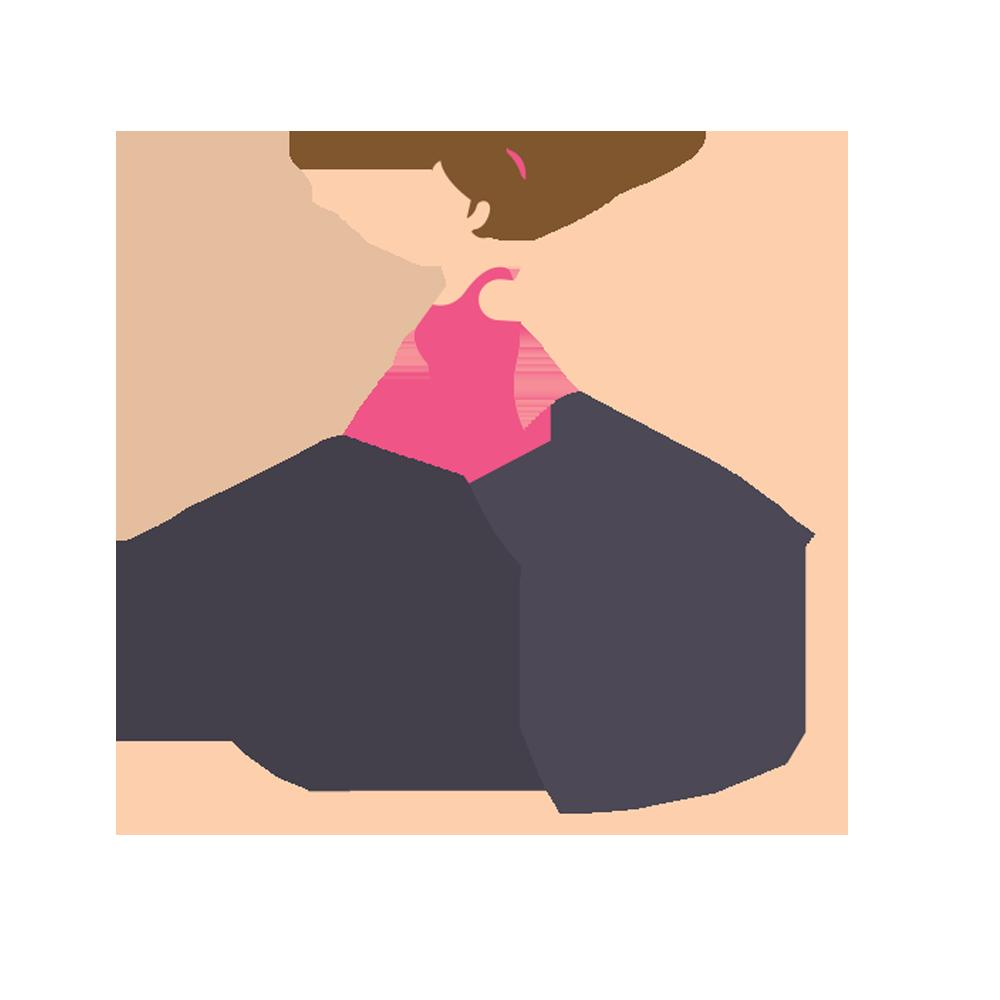

In [38]:
# 무작위로 다른 행의 값으로 대체
test_X.loc[230] = test_X.loc[np.random.choice(test.index)]
test_X.loc[345] = test_X.loc[np.random.choice(test.index)]

In [42]:
sum(test_X.isnull().any(axis=1))

0

In [54]:
results = pd.Series(final_model.predict(test_X.values))
Id = pd.Series([f"{i}.jpg" for i in range(0,389)])

In [55]:
result = pd.DataFrame({'Id':Id, 'Category':results})

In [56]:
result.to_csv("predict_xgboost.csv", index=False)